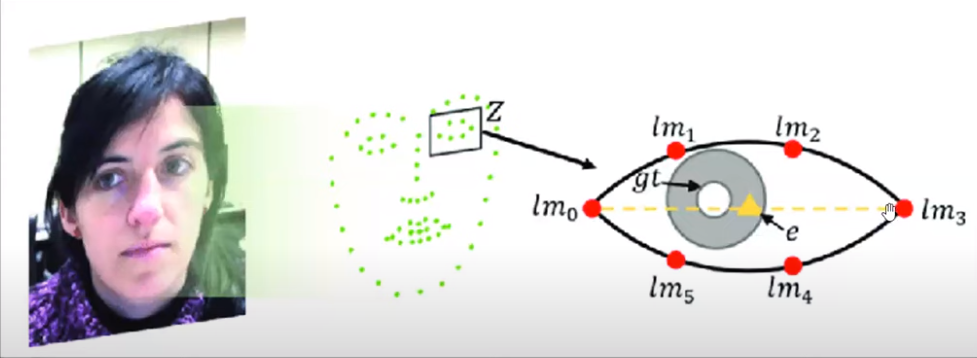

### Contours: bimshi 3la el boarders bta3t el object kolha mn gwa w mn bra
### convexhall: bimshi 3la el boarders kolha mn bra bs w mabia5idsh ay zawia 22l mn 45 aw akbar mn 180

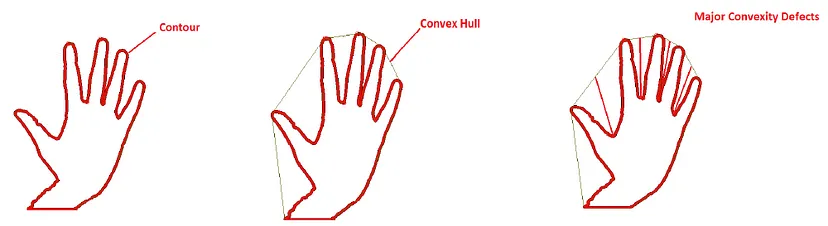

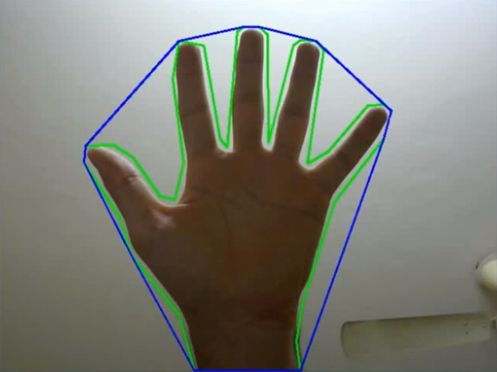

In [ ]:
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2
import datetime
import playsound
import time

In [ ]:
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2
import datetime
import playsound
import time

#COUNTER = 0
ALARM_ON = False
model_path = "shape_predictor_68_face_landmarks.dat"
ALARM_PATH = "assets_alarm.mp3"

def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def detect():
    thresh = 0.25
    frame_check = 10  # default is 20
    detect = dlib.get_frontal_face_detector()
    predict = dlib.shape_predictor(model_path)  # Dat file is the crux of the code

    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_68_IDXS["left_eye"]
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_68_IDXS["right_eye"]
    cap = cv2.VideoCapture(0)
    flag = 0
    while True:
        ret, frame = cap.read()
        # print(ret, frame)
        frame = imutils.resize(frame, width=640, height=640)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        subjects = detect(gray, 0)
        for subject in subjects:
            shape = predict(gray, subject)
            shape = face_utils.shape_to_np(shape)  # converting to NumPy Array
            leftEye = shape[lStart:lEnd]
            print("leftEye",leftEye)
            rightEye = shape[rStart:rEnd]
            leftEAR = eye_aspect_ratio(leftEye)
            rightEAR = eye_aspect_ratio(rightEye)
            ear = (leftEAR + rightEAR) / 2.0
            leftEyeHull = cv2.convexHull(leftEye)
            rightEyeHull = cv2.convexHull(rightEye)
            cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
            cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
            if ear < thresh:

                flag += 1

                #print("ear: ", flag)
                if flag >= frame_check:
                    if not ALARM_ON:
                        ALARM_ON = True
#                         time.sleep(0.01)

                    #datet = str(datetime.datetime.now())
                    cv2.putText(frame, "****************Drowsy!****************", (10, 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    #stop = timeit.default_timer()
                    cv2.putText(frame,'sleeping time 00:'+str(flag - 10)+'sec', (10, 60),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                   # print("Drowsy")
                    playsound.playsound(ALARM_PATH, True)
            else:
                flag = 0
                ALARM_ON = False
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
    cv2.destroyAllWindows()
    cap.release()


if __name__ == '__main__':
    detect()

leftEye [[350 358]
 [362 355]
 [374 357]
 [383 362]
 [373 362]
 [361 361]]
leftEye [[334 346]
 [346 340]
 [358 342]
 [367 349]
 [358 350]
 [346 349]]
leftEye [[327 338]
 [338 332]
 [349 333]
 [358 341]
 [349 341]
 [338 340]]
leftEye [[318 326]
 [328 321]
 [338 322]
 [346 329]
 [338 329]
 [327 328]]
leftEye [[317 324]
 [326 318]
 [336 320]
 [344 327]
 [336 327]
 [326 326]]
leftEye [[322 323]
 [331 320]
 [340 322]
 [347 327]
 [339 326]
 [330 325]]
leftEye [[324 324]
 [333 321]
 [342 323]
 [349 328]
 [341 327]
 [333 326]]
leftEye [[327 323]
 [336 321]
 [344 323]
 [351 327]
 [343 327]
 [335 325]]
leftEye [[330 325]
 [338 322]
 [346 324]
 [353 329]
 [346 328]
 [338 327]]
leftEye [[332 328]
 [340 325]
 [348 327]
 [355 331]
 [347 331]
 [340 330]]
leftEye [[332 328]
 [339 325]
 [346 327]
 [353 331]
 [346 331]
 [338 330]]
leftEye [[330 330]
 [337 328]
 [345 329]
 [351 333]
 [344 333]
 [337 332]]
leftEye [[328 333]
 [336 331]
 [343 331]
 [350 335]
 [343 336]
 [336 335]]
leftEye [[327 339]
 [334 